# shap testing 3
2/29/24

We will continue testing and plotting resutls for the shap analyses


ISM will also be done in this file

In [4]:
#first we have some data that we can load
from shap_analysis.shap_utils import ShapUtils
ckpt_path = '/data/leslie/sarthak/hyena/hyena-dna/outputs/2024-02-09/17-38-16-568113/checkpoints/last.ckpt'
all_ckpt_path = '/data/leslie/sarthak/hyena/hyena-dna/outputs/2024-02-17/09-34-21-368888/checkpoints/last.ckpt'
util = ShapUtils('DNase', ckpt_path, percentage_background = 1/30000)
import numpy as np
#now let's load the data
DNase = np.load('/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/shap_values_28.0ccre_DNase_highvar.npy')
Dnase_all = np.load('/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/shap_values_28.0ccre_DNase_allcelltypes_highvar.npy')

In [6]:
DNase.shape #I think we have 3 ccres?
DNase.shape[0]/3 #yes we do!!

161.0

In [7]:
Dnase_all.shape #oh, that' sdefinitely not right

(161, 1023, 128)

In [8]:
#let's find the indices
print(idx:=util.test_input_indices) #the 5 indices 

#now we analyze each of the 5 and all 161 cell types
output_ccres = []
counter = 0
for i in idx:
    if util.var(i) < 15:
        continue
    counter +=1
    print(i)
    if counter == 3:
        break
    

[405346 374232 314368 ... 676415 643462 193608]
814450
757510
273267


In [11]:
idx_list = [814450, 757510, 273267]
util.var(814450) #ok these all have high var!

15.96230695764537

In [12]:
import shap
from tqdm import tqdm
util = ShapUtils('DNase_allcelltypes', all_ckpt_path, percentage_background = 1/30000)
util.load_from_indices()
explainer = shap.DeepExplainer(util.model, util.background_embed)
output_all = []
for i in tqdm(idx_list, total = 3):
    a,_ = util.dataset[i]
    a_embed = util.backbone.backbone.embeddings.word_embeddings(a.unsqueeze(0))
    shap_values = explainer.shap_values(a_embed)
    mat = np.concatenate(shap_values, axis = 0)
    print(mat.shape)
    output_all.append(shap_values)


 33%|███████████████████████████████████████████████████████████████████                                                                                                                                      | 1/3 [04:55<09:51, 295.91s/it]

(161, 1023, 128)


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                   | 2/3 [10:13<05:08, 308.78s/it]

(161, 1023, 128)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [15:32<00:00, 310.71s/it]

(161, 1023, 128)


In [27]:
# for i in range(3):
#     output_all[i] = np.concatenate(output_all[i],axis=0)
DNase_all = np.concatenate(output_all, axis = 0)
DNase_all.shape #my god we had typed Dnase_all lmfao!

(483, 1023, 128)

In [21]:
output_all[0].shape
output_all[1].shape
output_all[2].shape

(161, 1023, 128)

In [24]:
output_all[0][0].shape

(1023, 128)

In [28]:
#now we can compare the results
ccre1 = DNase[0:161]
ccre1_all = DNase_all[0:161]
print(ccre1.shape, ccre1_all.shape)

(161, 1023, 128) (161, 1023, 128)


In [29]:
#let's compile them again with mean and pca
DNase_mean = np.mean(DNase, axis = 2)
DNase_all_mean = np.mean(DNase_all, axis = 2)
print(DNase_mean.shape, DNase_all_mean.shape)

(483, 1023) (483, 1023)


<Axes: >

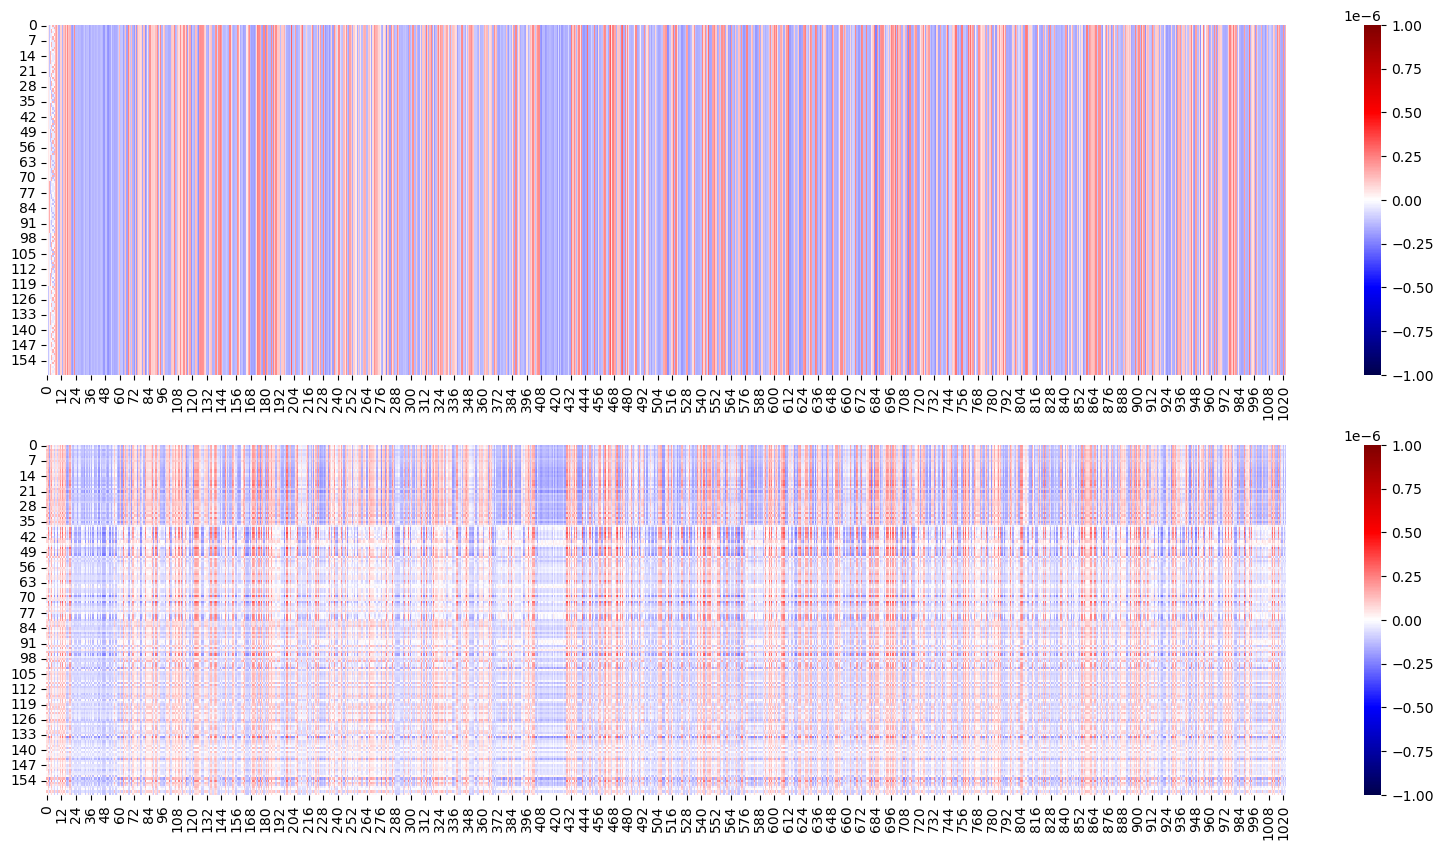

In [30]:
#now we plot
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,1, figsize = (20,10))
sns.heatmap(DNase_mean[0:161], ax = ax[0], center = 0, cmap = 'seismic', vmax = 1e-6, vmin = -1e-6)
sns.heatmap(DNase_all_mean[0:161], ax = ax[1], center = 0, cmap = 'seismic', vmax = 1e-6, vmin = -1e-6)
#add titles

<Axes: >

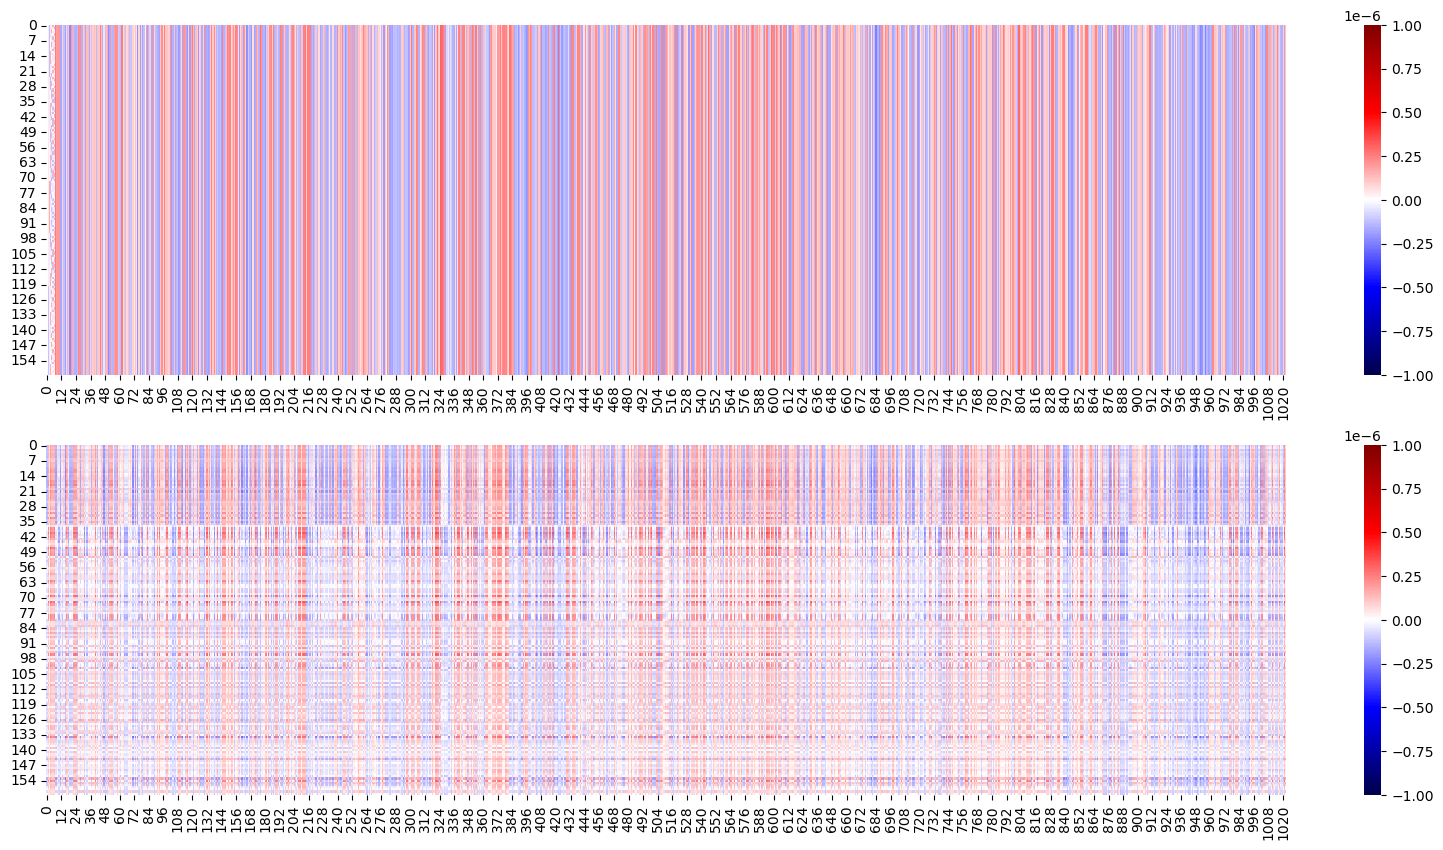

In [31]:
#with th enext 161
fig, ax = plt.subplots(2,1, figsize = (20,10))
sns.heatmap(DNase_mean[161:322], ax = ax[0], center = 0, cmap = 'seismic', vmax = 1e-6, vmin = -1e-6)
sns.heatmap(DNase_all_mean[161:322], ax = ax[1], center = 0, cmap = 'seismic', vmax = 1e-6, vmin = -1e-6)


<Axes: >

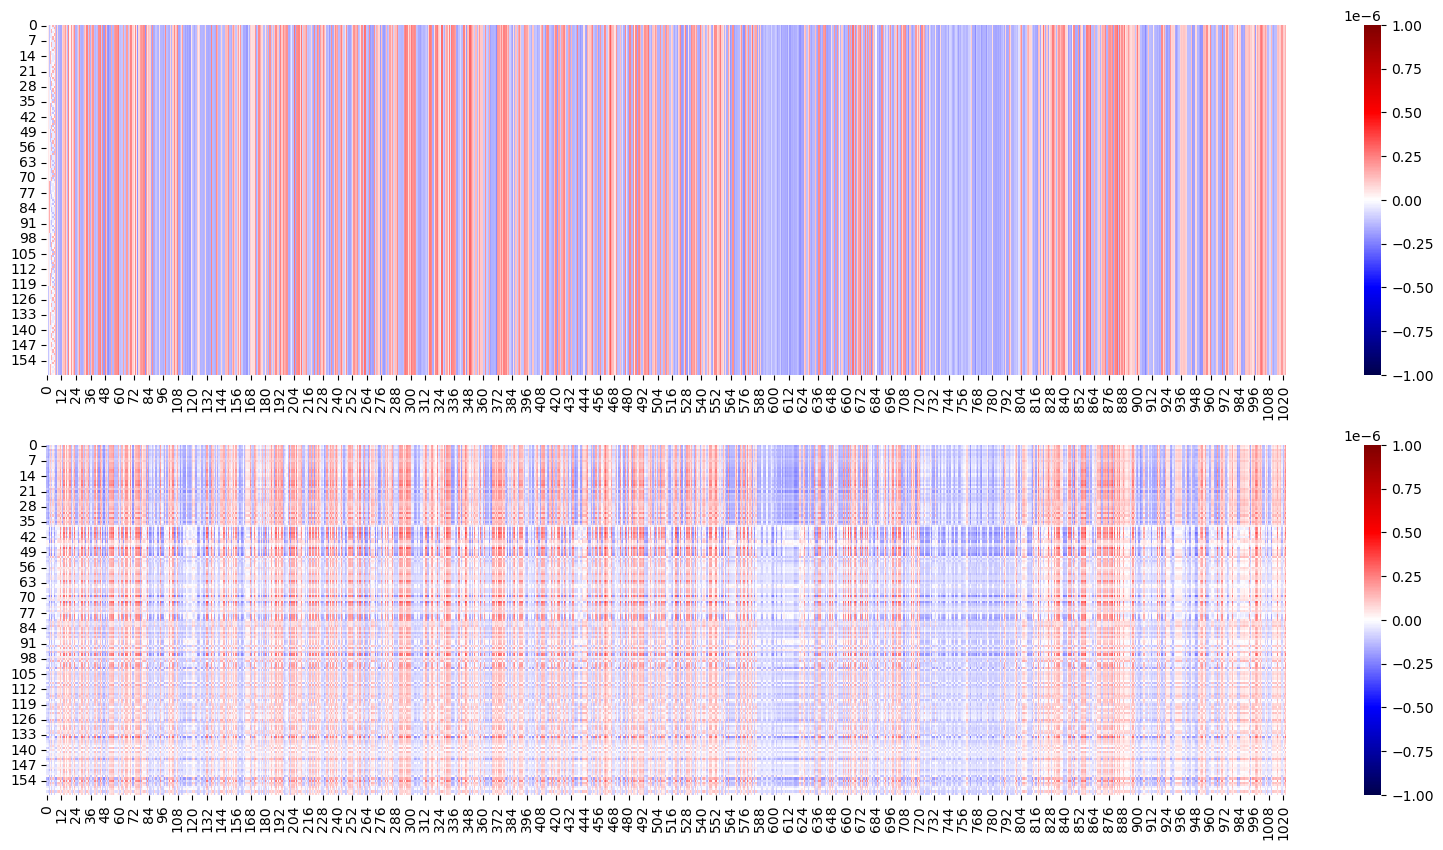

In [32]:
#and the last third
fig, ax = plt.subplots(2,1, figsize = (20,10))
sns.heatmap(DNase_mean[322:], ax = ax[0], center = 0, cmap = 'seismic', vmax = 1e-6, vmin = -1e-6)
sns.heatmap(DNase_all_mean[322:], ax = ax[1], center = 0, cmap = 'seismic', vmax = 1e-6, vmin = -1e-6)

# final shap test

In [2]:
#we will do a final test for shap values, here instead of using whole cCREs, we will just be sure to cover all 161 cell types 2-5 times
#let's start on 5 times, that makes it take a little while
from shap_analysis.shap_utils import ShapUtils
ckpt_path = '/data/leslie/sarthak/hyena/hyena-dna/outputs/2024-02-09/17-38-16-568113/checkpoints/last.ckpt'
all_ckpt_path = '/data/leslie/sarthak/hyena/hyena-dna/outputs/2024-02-17/09-34-21-368888/checkpoints/last.ckpt'
util = ShapUtils('DNase', ckpt_path, percentage_background = 1/30000)
#we don't actually care about the percentage background, we do our own thing

In [3]:
#now we want to go through our background set and choose arbitrary ones, it's already shuffled
#so we just go though the list and select 1 celltype from each cCRE
util.background_indices

array([849404, 265639, 735545, 560426,  70519, 640009,  79831, 799978,
       331352, 716416, 285036, 301594, 777796, 351741, 660131, 516989,
       333446, 668910, 397875, 467484,  78783, 777172, 453814, 506028,
       500512, 587413, 476526, 451289])

In [5]:
util.test_input_indices.shape

(856048,)

In [7]:
#let's actually swap and use the test_input_indices for training the background,the background will be what we test on
#so what we need to do is just add 162 to the index each time, because 
idx = 0
background_list = []
for i in range(161*5): #do this that many times
    a,_ = util.dataset[idx]
    a_embed = util.backbone.backbone.embeddings.word_embeddings(a)
    background_list.append(a_embed)
    idx +=162

In [9]:
print(len(background_list))
print(background_list[0].shape)

805
torch.Size([1023, 128])


In [11]:
#stack the list
import torch
background = torch.stack(background_list)
print(background.shape)

torch.Size([805, 1023, 128])


In [13]:
for i in util.background_indices:
    print(util.var(i))
print(util.var(640009)) #let's do this one since high variance across cell types!

8.489136546715258
3.893903337276574
5.38615236266952
5.02833927818728
2.75799087585028
11.301116504272121
3.3060739673421806
8.936435080257358
0.5023019705990908
5.690610792564103
2.9436120555577894
3.97961952469479
6.094876325626121
1.7614686608778733
2.4680155171273355
3.392274920818752
8.388797212538693
2.4174239829882396
1.1487318333347951
0.8670247327316281
0.31278606549198074
5.924193008851916
1.9077173655984445
3.063000589849715
0.38004977602164114
3.4346117440118826
1.9416185144749032
0.37170210481985055
11.301116504272121


In [14]:
#now we have our background, let's go ahead and do the shap values
import shap
from tqdm import tqdm
explainer = shap.DeepExplainer(util.model, background)
output_all = []
for i in tqdm(range(161)): #taking about 2.5 hours
    a,_ = util.dataset[161*640009+i]
    a_embed = util.backbone.backbone.embeddings.word_embeddings(a.unsqueeze(0))
    shap_values = explainer.shap_values(a_embed)
    # mat = np.concatenate(shap_values, axis = 0)
    # print(mat.shape)
    output_all.append(shap_values)

100%|██████████| 161/161 [2:10:01<00:00, 48.46s/it] 


In [15]:
#let's save out the shap values
import numpy as np
out = np.concatenate(output_all, axis = 0)
print(out.shape)

(161, 1023, 128)


In [16]:
np.save('/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/shap_values_5ccre_DNase_highvar.npy', out)

In [18]:
#and we can visualize, not really comparable, but let's try it
#again let's aggregate along the embeddign dimension, try mean
DNase_mean = np.mean(out, axis = 2)
print(DNase_mean.shape)

(161, 1023)


[ 0.00000000e+00  3.91633175e-08 -1.17843901e-07 ...  9.95491179e-08
  8.79645998e-08  8.67819528e-08]
[ 0.00000000e+00  3.91633175e-08 -1.17843901e-07 ...  9.95491179e-08
  8.79645998e-08  8.67819528e-08]
[ 0.00000000e+00  3.91633175e-08 -1.17843901e-07 ...  9.95491179e-08
  8.79645998e-08  8.67819528e-08]
[ 0.00000000e+00  3.91633175e-08 -1.17843901e-07 ...  9.95491179e-08
  8.79645998e-08  8.67819528e-08]
[ 0.00000000e+00  3.91633175e-08 -1.17843901e-07 ...  9.95491179e-08
  8.79645998e-08  8.67819528e-08]


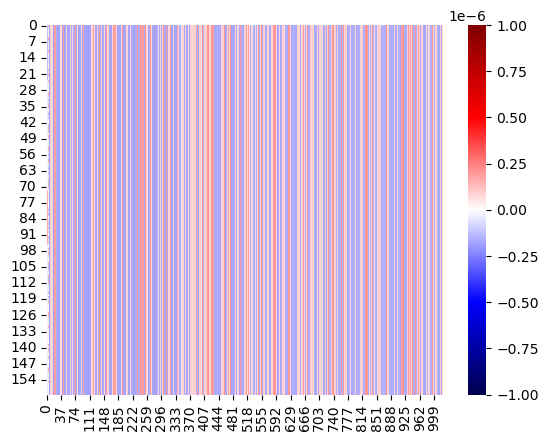

In [26]:
#an seaborn plot
import seaborn as sns
sns.heatmap(DNase_mean, center = 0, cmap = 'seismic', vmax = 1e-6, vmin = -1e-6)
#once again exaclty the same
print(DNase_mean[0])
print(DNase_mean[1])
print(DNase_mean[2])
print(DNase_mean[5])
print(DNase_mean[10])

In [24]:
for i in tqdm(range(161)): #taking about 2.5 hours
    a,_ = util.dataset[161*640009+i]
    print(a[0:10])
    if i == 3:
        break

  2%|▏         | 3/161 [00:00<00:00, 187.52it/s]

tensor([12, 13, 14, 15, 16, 17, 18,  7, 10,  8])
tensor([12, 13, 14, 15, 16, 18, 17,  7, 10,  8])
tensor([12, 13, 14, 15, 17, 16, 18,  7, 10,  8])
tensor([12, 13, 14, 15, 17, 18, 16,  7, 10,  8])


In [28]:
#find which rows in DNase_mean are identical
for i in range(161):
    for j in range(i+1, 161):
        if not np.array_equal(DNase_mean[i], DNase_mean[j]):
            print(i,j) #not exactly equal in almost all of them

0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
0 53
0 54
0 55
0 56
0 57
0 58
0 59
0 60
0 61
0 62
0 63
0 64
0 65
0 66
0 67
0 68
0 69
0 70
0 71
0 72
0 73
0 74
0 75
0 76
0 77
0 78
0 79
0 80
0 81
0 82
0 83
0 84
0 85
0 86
0 87
0 88
0 89
0 90
0 91
0 92
0 93
0 94
0 95
0 96
0 97
0 98
0 99
0 100
0 101
0 102
0 103
0 104
0 105
0 106
0 107
0 108
0 109
0 110
0 111
0 112
0 113
0 114
0 115
0 116
0 117
0 118
0 119
0 120
0 121
0 122
0 123
0 124
0 125
0 126
0 127
0 128
0 129
0 130
0 131
0 132
0 133
0 134
0 135
0 136
0 137
0 138
0 139
0 140
0 141
0 142
0 143
0 144
0 145
0 146
0 147
0 148
0 149
0 150
0 151
0 152
0 153
0 154
0 155
0 156
0 157
0 158
0 159
0 160
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25
1 26
1 27
1 28
1 29
1 30
1 31
1 32
1

# implementing ISM

In [29]:
#we realized that shap isn't giving results that are interpretable for the model, so let's try ISM and make a traditional plot type thing
#we will have to redo some of the utils, but will be similar to shap, for now let's use it since it can load the data, now need to load the model too

#we actually have the model loaded already, it's just the backbone and the decoder, no need to first do anything

#so let's just do the ISM
#we just reuse shap_utils
from shap_analysis.shap_utils import ShapUtils
ckpt_path = '/data/leslie/sarthak/hyena/hyena-dna/outputs/2024-02-09/17-38-16-568113/checkpoints/last.ckpt' #this is again the 10% 100 epochs one
utils = ShapUtils('DNase', ckpt_path, percentage_background = 1/30000)
#now we can test on the same cCRE
#let's start with the first cell type
idx = 161*640009
seq, target = utils.dataset[idx]
#now compare them
a,_ = utils.backbone(seq.unsqueeze(0))
print(a.shape)
out = utils.decoder(a)
print(out)
print(target) #let's us test if we're evaluating things correctly

torch.Size([1, 1023, 128])
tensor([[-3.6737]], grad_fn=<AddmmBackward0>)
tensor([-10.])


In [17]:
print(util.tokenizer._vocab_int_to_str)

{0: '[CLS]', 1: '[SEP]', 2: '[BOS]', 3: '[MASK]', 4: '[PAD]', 5: '[RESERVED]', 6: '[UNK]', 7: 'A', 8: 'C', 9: 'G', 10: 'T', 11: 'N', 12: 'S', 13: 'U', 14: 'V', 15: 'W', 16: 'X', 17: 'Y', 18: 'Z'}


In [33]:
print(seq) #so we know which tokens to ignore
#so it's 7 8 9 10
print(seq[:10])

tensor([12, 13, 14,  ...,  7,  7,  7])
tensor([12, 13, 14, 15, 16, 17, 18,  7, 10,  8])


In [32]:
#basic ism loop
token_list = ['A','C','G','T'] #tokenize this list first
token_list = [utils.tokenizer._vocab_str_to_int[i] for i in token_list]
print(token_list) #this is exactly what we want

[7, 8, 9, 10]


In [42]:
ISM_results = np.zeros((4,1023)) #for each one there's all 4 tokens, and 1023 positions, will find a way to aggregate across celltypes later
for i in seq[7:]: #the 8th index is the first one we want
    # print(i) #prints 7
    # break
    temp_token_list = token_list.copy() #we make a copy
    #now pop out i
    temp_token_list.remove(i)
    temp_token_list = np.array(temp_token_list)
    # print(temp_token_list)
    # break
    results_list = []
    for j in temp_token_list:
        # print(j)
        # break
        temp_seq = seq.clone()
        temp_seq[i] = j
        # print(temp_seq)
        # break
        a,_ = utils.backbone(temp_seq.unsqueeze(0))
        out = utils.decoder(a)
        # print(out)
        # break
        results_list.append(out.item())
    ISM_results[temp_token_list-7,i] = np.array(results_list)
    break
print(ISM_results[:,7])
#can subtract the actual output as the global mean, so that it is the center and see the compared difference
#or do that minus all these values to show the difference, we can think that through

[ 0.         -3.49523473 -3.65169358 -3.61775565]


In [51]:
ISM_results = np.zeros((4,1023)) #for each one there's all 4 tokens, and 1023 positions, will find a way to aggregate across celltypes later
for idx, nucleotide in tqdm(enumerate(seq),total=len(seq)): #the 8th index is the first one we want
    # print(idx) #prints 7
    # print(nucleotide)
    # break
    if idx < 7:
        continue
    # print(idx) #prints 7
    # print(nucleotide)
    temp_token_list = token_list.copy() #we make a copy
    #now pop out i
    temp_token_list.remove(nucleotide)
    temp_token_list = np.array(temp_token_list)
    # print(temp_token_list)
    # break
    results_list = []
    for j in temp_token_list:
        # print(j)
        # break
        temp_seq = seq.clone()
        temp_seq[idx] = j
        # print(temp_seq)
        # break
        a,_ = utils.backbone(temp_seq.unsqueeze(0))
        out = utils.decoder(a)
        # print(out)
        # break
        results_list.append(out.item())
    ISM_results[temp_token_list-7,idx] = np.array(results_list)
#relatively slow on the CPU

  0%|          | 0/1023 [00:00<?, ?it/s]

100%|██████████| 1023/1023 [01:25<00:00, 11.92it/s]


<Axes: >

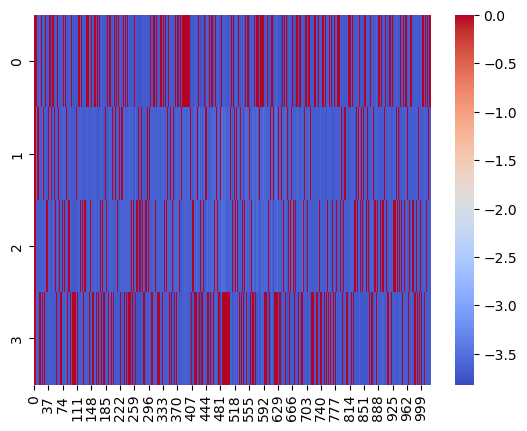

In [56]:
#now we can do a heatmap
sns.heatmap(ISM_results, cmap = 'coolwarm')

In [57]:
print(out)

tensor([[-3.6752]], grad_fn=<AddmmBackward0>)


In [59]:
a,_ = utils.backbone(seq.unsqueeze(0))
print(a.shape)
out_gt = utils.decoder(a)
print(out_gt)
print(target)

torch.Size([1, 1023, 128])
tensor([[-3.6737]], grad_fn=<AddmmBackward0>)
tensor([-10.])


In [61]:
#same plot but we do it minus the global mean
#also, we should actually set the values not to 0 but the default
ISM_results = np.ones((4,1023))*out_gt.detach().numpy()
#for each one there's all 4 tokens, and 1023 positions, will find a way to aggregate across celltypes later
for idx, nucleotide in tqdm(enumerate(seq),total=len(seq)): #the 8th index is the first one we want
    if idx < 7:
        continue
    temp_token_list = token_list.copy() #we make a copy
    temp_token_list.remove(nucleotide)
    temp_token_list = np.array(temp_token_list)
    results_list = []
    for j in temp_token_list:
        temp_seq = seq.clone()
        temp_seq[idx] = j
        a,_ = utils.backbone(temp_seq.unsqueeze(0))
        out = utils.decoder(a)
        results_list.append(out.item())
    ISM_results[temp_token_list-7,idx] = np.array(results_list)
#relatively slow on the CPU

100%|██████████| 1023/1023 [01:26<00:00, 11.88it/s]


In [62]:
#and now we subtract the out_gt from it
ISM_results_normalized = ISM_results - out_gt.detach().numpy()

Text(0.5, 1.0, 'difference from original predcited value via ISM')

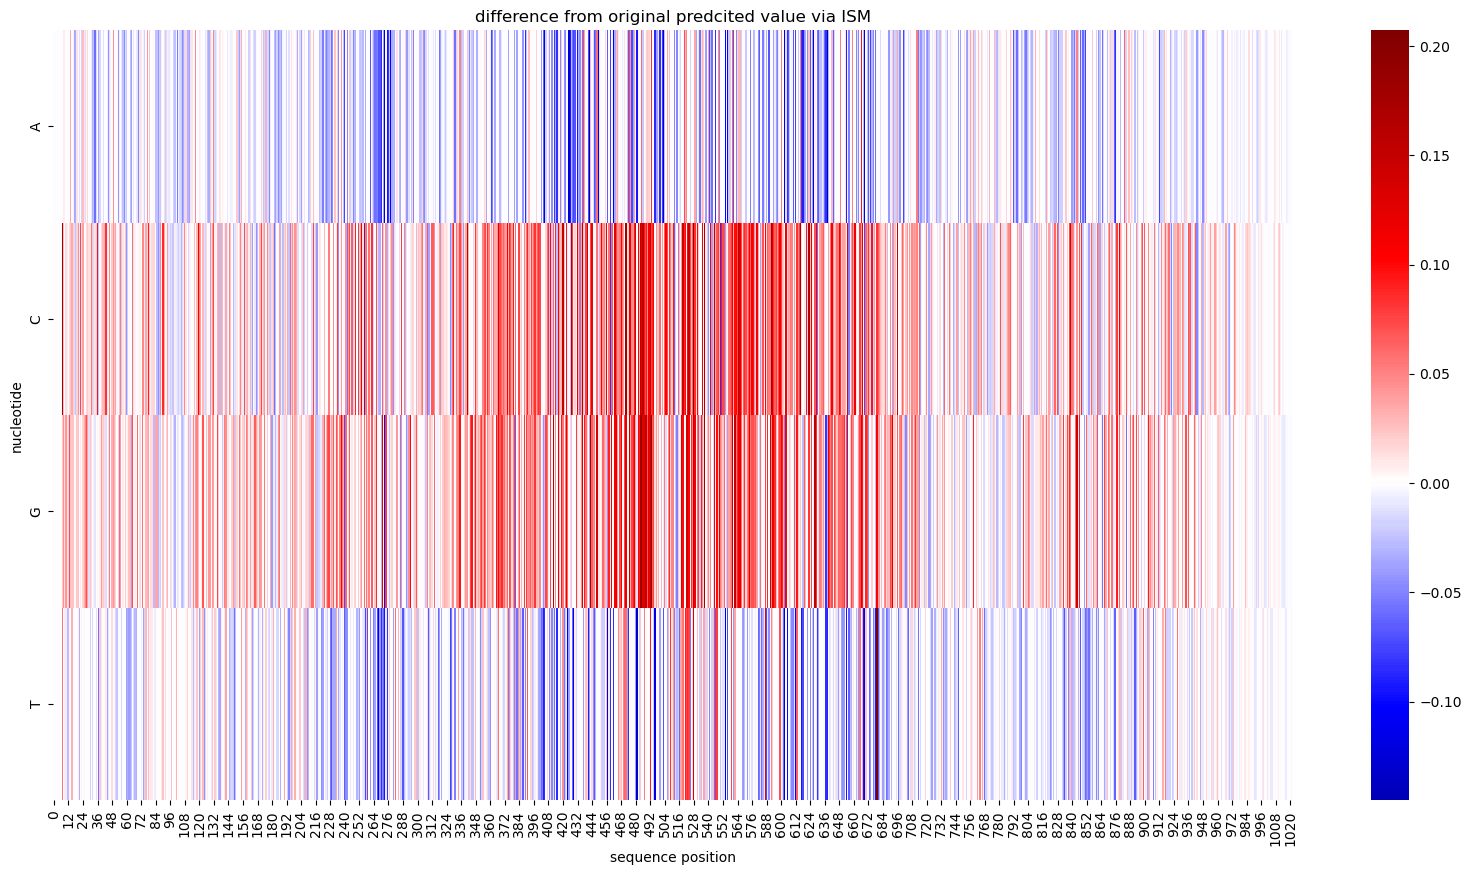

In [70]:
#make a large figure
fig, ax = plt.subplots(1,1, figsize = (20,10))
sns.heatmap(ISM_results_normalized, cmap = 'seismic', center = 0)
import matplotlib.pyplot as plt
plt.yticks([0.5,1.5,2.5,3.5],['A','C','G','T'])
plt.xlabel('sequence position')
plt.ylabel('nucleotide')
plt.title('difference from original predcited value via ISM')

## ideas

Foro sequence type visualization, use that package we installed. then we can aggregate them using sum or mean or something like sum of abs

for all cell types similar heatmap but aggregate via sum of abs or something then we plot all sequence by cell types, so 1024 x 161.

Just visualize gradients, then can see if it's an issue with shap vs gradients

In [71]:
#visualizing gradients
idx = 161*640009
seq, target = utils.dataset[idx]
seq.requires_grad_(True)
a,_ = utils.backbone(seq.unsqueeze(0))
out_gt = utils.decoder(a)

out_gt.backward()
gradients = seq.grad
print(gradients.shape)

RuntimeError: only Tensors of floating point dtype can require gradients

In [75]:
#like before we have to actually start from the embedding, the gradients can't flow directly to the tokens
idx = 161*640009
seq, target = utils.dataset[idx]
seq_embed = util.backbone.backbone.embeddings.word_embeddings(seq.unsqueeze(0))
# seq_embed.requires_grad_(True)
out = utils.model(seq_embed)
print(out)


tensor([[-0.0511]], grad_fn=<AddmmBackward0>)


In [74]:
temp,_ = utils.backbone(seq.unsqueeze(0))
out = utils.decoder(temp)
print(out)

tensor([[-3.6737]], grad_fn=<AddmmBackward0>)


In [77]:
utils.backbone

DNAEmbeddingModel(
  (backbone): LMBackbone(
    (embeddings): GPT2Embeddings(
      (word_embeddings): Embedding(20, 128)
    )
    (layers): ModuleList(
      (0): Block(
        (mixer): HyenaOperator(
          (activation): Identity()
          (dropout): Dropout(p=0.0, inplace=False)
          (out_proj): Linear(in_features=128, out_features=128, bias=True)
          (in_proj): Linear(in_features=128, out_features=384, bias=True)
          (short_filter): Conv1d(384, 384, kernel_size=(3,), stride=(1,), padding=(2,), groups=384)
          (filter_fn): HyenaFilter(
            (dropout): Dropout(p=0.0, inplace=False)
            (pos_emb): PositionalEmbedding()
            (implicit_filter): Sequential(
              (0): Linear(in_features=5, out_features=64, bias=True)
              (1): Sin()
              (2): Linear(in_features=64, out_features=64, bias=True)
              (3): Sin()
              (4): Linear(in_features=64, out_features=64, bias=True)
              (5): Sin()

In [1]:
#how did we not think to test this? I think there's an issue with my NetNoembed model!!
#reset everything and load it all back in!
from shap_analysis.shap_utils import ShapUtils
ckpt_path = '/data/leslie/sarthak/hyena/hyena-dna/outputs/2024-02-09/17-38-16-568113/checkpoints/last.ckpt' #this is again the 10% 100 epochs one
utils = ShapUtils('DNase', ckpt_path, percentage_background = 1/30000)
idx = 161*640009
seq, target = utils.dataset[idx]
seq_embed = utils.backbone.backbone.embeddings.word_embeddings(seq.unsqueeze(0))
seq_embed.requires_grad_(True)


tensor([[[ 0.0047, -0.0022,  0.0102,  ..., -0.0056,  0.0033, -0.0058],
         [ 0.0028, -0.0003,  0.0042,  ...,  0.0069, -0.0026,  0.0038],
         [-0.0024, -0.0070, -0.0008,  ...,  0.0053, -0.0072, -0.0022],
         ...,
         [ 0.0010,  0.0009, -0.0018,  ..., -0.0017,  0.0002,  0.0035],
         [ 0.0010,  0.0009, -0.0018,  ..., -0.0017,  0.0002,  0.0035],
         [ 0.0010,  0.0009, -0.0018,  ..., -0.0017,  0.0002,  0.0035]]],
       grad_fn=<EmbeddingBackward0>)

In [2]:
a,_ = utils.backbone_skip(seq_embed)
out = utils.decoder(a)
print(out) #this matches above, so this is properly how we run it throught hte model from the embedding!!

tensor([[-3.6737]], grad_fn=<AddmmBackward0>)


In [3]:
utils.model(seq_embed) #ah something is definitely wrong with this!!
#we fixed it now, and it works!!

tensor([[-3.6737]], grad_fn=<AddmmBackward0>)

# redo analysis now with the bug fixed

In [5]:
#let's actually swap and use the test_input_indices for training the background,the background will be what we test on
#so what we need to do is just add 162 to the index each time, because 
util = utils
idx = 0
background_list = []
for i in range(161*2): #do this that many times
    a,_ = util.dataset[idx]
    a_embed = util.backbone.backbone.embeddings.word_embeddings(a)
    background_list.append(a_embed)
    idx +=162
# print(len(background_list))
# print(background_list[0].shape)
#stack the list
import torch
background = torch.stack(background_list)
# print(background.shape)
# for i in util.background_indices:
#     print(util.var(i))
# print(util.var(640009)) #let's do this one since high variance across cell types!
#now we have our background, let's go ahead and do the shap values
import shap
from tqdm import tqdm
explainer = shap.DeepExplainer(util.model, background)
output_all = []
for i in tqdm(range(161)): #taking about 2.5 hours
    a,_ = util.dataset[161*640009+i]
    a_embed = util.backbone.backbone.embeddings.word_embeddings(a.unsqueeze(0))
    shap_values = explainer.shap_values(a_embed)
    # mat = np.concatenate(shap_values, axis = 0)
    # print(mat.shape)
    output_all.append(shap_values)
#let's save out the shap values
import numpy as np
out = np.concatenate(output_all, axis = 0)
# print(out.shape)
np.save('/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/shap_values_5ccre_DNase_highvar.npy', out)
#and we can visualize, not really comparable, but let's try it
#again let's aggregate along the embeddign dimension, try mean
DNase_mean = np.mean(out, axis = 2)
# print(DNase_mean.shape)
#an seaborn plot
import seaborn as sns
sns.heatmap(DNase_mean, center = 0, cmap = 'seismic', vmax = 1e-6, vmin = -1e-6)
#once again exaclty the same
# print(DNase_mean[0])
# print(DNase_mean[1])
# print(DNase_mean[2])
# print(DNase_mean[5])
# print(DNase_mean[10])

  0%|                                                                                                                                                     | 0/161 [01:06<?, ?it/s]


AssertionError: The SHAP explanations do not sum up to the model's output! This is either because of a rounding error or because an operator in your computation graph was not fully supported. If the sum difference of %f is significant compared to the scale of your model outputs, please post as a github issue, with a reproducible example so we can debug it. Used framework: pytorch - Max. diff: 4.598023031571107 - Tolerance: 0.01

In [6]:
util.model(a_embed)

tensor([[-3.6737]], grad_fn=<AddmmBackward0>)

In [7]:
background.shape

torch.Size([322, 1023, 128])

In [10]:
util.model(background[-1].unsqueeze(0))

tensor([[0.2117]], grad_fn=<AddmmBackward0>)

In [15]:
b,_=util.backbone(a.unsqueeze(0))
print(util.decoder(b))

tensor([[-3.6450]], grad_fn=<AddmmBackward0>)


In [19]:
a_embed = util.backbone.backbone.embeddings.word_embeddings(a.unsqueeze(0))
b,_=util.backbone_skip(a_embed)
print(util.decoder(b))
#still some difference, this isn't good at all!

tensor([[-3.6737]], grad_fn=<AddmmBackward0>)


In [22]:
#let's make sure that we do the embedding properly
#this is what is run
# hidden_states = self.embeddings(
#                 input_ids, position_ids=position_ids, **embedding_kwargs
#             )
#also there's this part
# embedding_kwargs = (
#             {"combine_batch_seqlen_dim": True}
#             if self.process_group is not None and self.sequence_parallel
#             else {}
#         )
print(util.backbone.backbone.process_group) # is none, so the if is not run, it's the {}
print(util.backbone.backbone.sequence_parallel)

None
True


In [23]:
embedding_kwargs = {}
embed_full = util.backbone.backbone.embeddings(a.unsqueeze(0), position_ids = None, **embedding_kwargs)
print(embed_full.shape)

torch.Size([1, 1023, 128])


In [24]:
#do the normal embedding
a_embed = util.backbone.backbone.embeddings.word_embeddings(a.unsqueeze(0))
print(a_embed.shape)

torch.Size([1, 1023, 128])


In [26]:
#compare the two to see if they are exactly equal
print(torch.all(torch.eq(embed_full, a_embed))) #they are exactly equal, so the embedding is done properly

tensor(True)


In [27]:
#let's recheck to see which one is actually correct
a,_ = util.dataset[161*640009]
a_embed = util.backbone.backbone.embeddings.word_embeddings(a.unsqueeze(0))
b,_=util.backbone_skip(a_embed)
print(util.decoder(b))
b,_ = util.backbone(a.unsqueeze(0))
print(util.decoder(b)) #this is the correct one, so we need to fix the skip

tensor([[-3.6737]], grad_fn=<AddmmBackward0>)
tensor([[-3.5630]], grad_fn=<AddmmBackward0>)


In [28]:
print(util.model(a_embed)) #this is the same as the above, which is to be expected, model is literally skip then decoder


tensor([[-3.6737]], grad_fn=<AddmmBackward0>)


In [1]:
#wait no it's the non skip that's wrong actually... how is that possible I changed some things, let's try it again
from shap_analysis.shap_utils import ShapUtils
ckpt_path = '/data/leslie/sarthak/hyena/hyena-dna/outputs/2024-02-09/17-38-16-568113/checkpoints/last.ckpt' #this is again the 10% 100 epochs one
utils = ShapUtils('DNase', ckpt_path, percentage_background = 1/30000)
idx = 161*640009
seq, target = utils.dataset[idx]
seq_embed = utils.backbone.backbone.embeddings.word_embeddings(seq.unsqueeze(0))
seq_embed.requires_grad_(True)


tensor([[[ 0.0047, -0.0022,  0.0102,  ..., -0.0056,  0.0033, -0.0058],
         [ 0.0028, -0.0003,  0.0042,  ...,  0.0069, -0.0026,  0.0038],
         [-0.0024, -0.0070, -0.0008,  ...,  0.0053, -0.0072, -0.0022],
         ...,
         [ 0.0010,  0.0009, -0.0018,  ..., -0.0017,  0.0002,  0.0035],
         [ 0.0010,  0.0009, -0.0018,  ..., -0.0017,  0.0002,  0.0035],
         [ 0.0010,  0.0009, -0.0018,  ..., -0.0017,  0.0002,  0.0035]]],
       grad_fn=<EmbeddingBackward0>)

In [2]:
#now let's run it through both
b,_ = utils.backbone_skip(seq_embed)
print(utils.decoder(b))
print(utils.model(seq_embed))
b,_ = utils.backbone(seq.unsqueeze(0))
print(utils.decoder(b))

tensor([[-3.6737]], grad_fn=<AddmmBackward0>)
tensor([[-3.6737]], grad_fn=<AddmmBackward0>)
tensor([[-3.6491]], grad_fn=<AddmmBackward0>)


In [4]:
backbone = utils.backbone
backbone = backbone.eval()

In [5]:
b,_ = backbone(seq.unsqueeze(0))
print(utils.decoder(b)) #ahh that's the issue, we weren't in eval mode!!! We were for the other one, and in the previous old one also was in eval somehow
#wrote about it in the utils, but basically calling eval on the larger model puts all the submodules in eval mode too!!

#so now we know we're good, but now shap isn't happy at all?

tensor([[-3.6737]], grad_fn=<AddmmBackward0>)


# shap analysis part 2

In [3]:
#let's actually swap and use the test_input_indices for training the background,the background will be what we test on
#so what we need to do is just add 162 to the index each time, because 
from shap_analysis.shap_utils import ShapUtils
ckpt_path = '/data/leslie/sarthak/hyena/hyena-dna/outputs/2024-02-09/17-38-16-568113/checkpoints/last.ckpt' #this is again the 10% 100 epochs one
util = ShapUtils('DNase', ckpt_path, percentage_background = 1/30000)
idx = 0
background_list = []
for i in range(161*5): #do this that many times
    a,_ = util.dataset[idx]
    a_embed = util.backbone.backbone.embeddings.word_embeddings(a)
    background_list.append(a_embed)
    idx +=162
# print(len(background_list))
# print(background_list[0].shape)
#stack the list
import torch
background = torch.stack(background_list)
# print(background.shape)
# for i in util.background_indices:
#     print(util.var(i))
# print(util.var(640009)) #let's do this one since high variance across cell types!
#now we have our background, let's go ahead and do the shap values
import shap
from tqdm import tqdm
explainer = shap.DeepExplainer(util.model, background)
output_all = []
for i in tqdm(range(161)): #taking about 2.5 hours
    a,_ = util.dataset[161*640009+i]
    a_embed = util.backbone.backbone.embeddings.word_embeddings(a.unsqueeze(0))
    shap_values = explainer.shap_values(a_embed)
    # mat = np.concatenate(shap_values, axis = 0)
    # print(mat.shape)
    output_all.append(shap_values)
#let's save out the shap values
import numpy as np
out = np.concatenate(output_all, axis = 0)
# print(out.shape)
np.save('/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/shap_values_5ccre_DNase_highvar.npy', out)
#and we can visualize, not really comparable, but let's try it
#again let's aggregate along the embeddign dimension, try mean
DNase_mean = np.mean(out, axis = 2)
# print(DNase_mean.shape)
#an seaborn plot
import seaborn as sns
sns.heatmap(DNase_mean, center = 0, cmap = 'seismic', vmax = 1e-6, vmin = -1e-6)
#once again exaclty the same
# print(DNase_mean[0])
# print(DNase_mean[1])
# print(DNase_mean[2])
# print(DNase_mean[5])
# print(DNase_mean[10])

  0%|                                                                                                                                                     | 0/161 [03:47<?, ?it/s]


AssertionError: The SHAP explanations do not sum up to the model's output! This is either because of a rounding error or because an operator in your computation graph was not fully supported. If the sum difference of %f is significant compared to the scale of your model outputs, please post as a github issue, with a reproducible example so we can debug it. Used framework: pytorch - Max. diff: 4.4657446915243755 - Tolerance: 0.01

In [13]:
#let's try checking the gradients
idx = 161*640009
seq, target = util.dataset[idx]
seq_embed = util.backbone.backbone.embeddings.word_embeddings(seq.unsqueeze(0))
seq_embed.requires_grad_(True)
out = util.model(seq_embed)
print(out.requires_grad)
print(out)
print(out.shape)
out[0,0].backward()
gradients = seq_embed.grad
print(gradients)


True
tensor([[-3.6737]], grad_fn=<AddmmBackward0>)
torch.Size([1, 1])
None


In [15]:
#let's set model to train and try again
util.model.train()
out = util.model(seq_embed)
print(out.requires_grad)
print(out)
out.backward()
# out[0,0].backward()
gradients = seq_embed.grad
print(gradients)

True
tensor([[-3.5325]], grad_fn=<AddmmBackward0>)


RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

In [17]:
seq_embed = util.backbone.backbone.embeddings(seq.unsqueeze(0))
seq_embed.requires_grad_(True)
out = util.model(seq_embed)
print(out.requires_grad)
print(out)
print(out.shape)
out[0,0].backward()
gradients = seq_embed.grad
print(gradients)
util.model.train()
out = util.model(seq_embed)
print(out.requires_grad)
print(out)
out.backward()
# out[0,0].backward()
gradients = seq_embed.grad
print(gradients)

True
tensor([[-3.5527]], grad_fn=<AddmmBackward0>)
torch.Size([1, 1])
None
True
tensor([[-3.6359]], grad_fn=<AddmmBackward0>)


RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

In [19]:
util.model.train()
seq_embed = util.backbone.backbone.embeddings(seq.unsqueeze(0))
seq_embed.requires_grad_(True)
out = util.model(seq_embed)
out.backward() #yeah whether we do out or out[0,0] we get the same issue whether we do train or not
gradients = seq_embed.grad
print(gradients)

None


In [20]:
#maybe start from the seq again
seq = util.dataset[161*640009][0]
seq.requires_grad_(True)
seq_embed = util.backbone.backbone.embeddings(seq.unsqueeze(0))
out = util.model(seq_embed)
out.backward()
gradients = seq.grad
print(gradients)

RuntimeError: only Tensors of floating point dtype can require gradients

In [22]:
seq_embed = util.backbone.backbone.embeddings(seq.unsqueeze(0))
seq_embed.requires_grad_(True)
out = util.model(seq_embed)
out_scalar = out.squeeze()  # Reduce it to a scalar if necessary
out_scalar.backward()
# out_sca.backward()
gradients = seq_embed.grad
print(gradients)

None


In [25]:
#let's try this with the other model
util.backbone.train()
util.decoder.train()
seq = util.dataset[161*640009][0]
b,_ = util.backbone(seq.unsqueeze(0))
out = util.decoder(b)
out.backward()
gradients = seq.grad
print(gradients)

None


In [24]:
print(out)

tensor([[-3.6737]], grad_fn=<AddmmBackward0>)


In [26]:
for name, parameter in util.backbone.named_parameters():
    if parameter.requires_grad:
        print(name, parameter.grad)


backbone.embeddings.word_embeddings.weight tensor([[  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000],
        [  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000],
        [  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000],
        ...,
        [-66.5947,  70.3870,  65.0161,  ...,   9.3714,  26.3735, -31.5729],
        [ 33.9877, -62.6903,  -6.4500,  ...,  38.8087,  46.6193,  49.9872],
        [  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000]])
backbone.layers.0.mixer.out_proj.weight tensor([[-6.9285e-01,  4.3680e-01,  2.9000e-01,  ..., -3.4162e-01,
          5.1934e-01, -5.6545e-01],
        [ 1.0056e-01, -2.3404e-01, -8.5238e-01,  ..., -4.0234e-01,
         -7.1149e-01, -6.3763e-01],
        [ 2.5431e-01, -3.7567e-01, -8.2774e-01,  ...,  1.5226e-02,
         -3.7019e-01, -5.5959e-01],
        ...,
        [-1.1376e-01,  3.7319e-01, -1.0413e+00,  ...,  3.8053e-01,
          1.3201e-02, -7.0716e-01],
        [-4.7831e-01, 

In [31]:
gradients = util.backbone.backbone.embeddings.word_embeddings.weight.grad
print(gradients)

tensor([[  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000],
        [  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000],
        [  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000],
        ...,
        [-66.5947,  70.3870,  65.0161,  ...,   9.3714,  26.3735, -31.5729],
        [ 33.9877, -62.6903,  -6.4500,  ...,  38.8087,  46.6193,  49.9872],
        [  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000]])


In [32]:
print(gradients.shape)

torch.Size([20, 128])


In [34]:
#now let's see if we can access the embeddings for the other model
util.model.train()
seq_embed = util.backbone.backbone.embeddings(seq.unsqueeze(0))
seq_embed.requires_grad_(True)
out = util.model(seq_embed)
out.backward() #yeah whether we do out or out[0,0] we get the same issue whether we do train or not
# gradients = seq_embed.grad
# print(gradients)
for name, parameter in util.model.named_parameters():
    if parameter.requires_grad:
        print(name, parameter.grad)

backbone.backbone.embeddings.word_embeddings.weight None
backbone.backbone.layers.0.mixer.out_proj.weight tensor([[-6.6788e+00,  4.0949e+00,  3.0124e+00,  ..., -3.7502e+00,
          4.9109e+00, -5.5039e+00],
        [ 1.3195e+00, -3.1291e+00, -9.4053e+00,  ..., -3.4358e+00,
         -6.7625e+00, -6.3821e+00],
        [ 2.6528e+00, -4.0710e+00, -7.2369e+00,  ...,  1.0960e-02,
         -3.3179e+00, -6.2064e+00],
        ...,
        [-9.5572e-01,  3.1182e+00, -1.0452e+01,  ...,  4.4736e+00,
          4.7195e-01, -7.2356e+00],
        [-5.0836e+00,  1.1109e+00, -2.8143e+01,  ..., -7.2890e-01,
          7.9773e+00,  8.6511e-01],
        [-1.5108e-01, -1.7966e+00,  5.1192e+01,  ...,  3.0486e+00,
          1.7951e+00, -4.8135e-01]])
backbone.backbone.layers.0.mixer.out_proj.bias tensor([-107.5289,  190.8242, -117.5585, -107.6529,  150.2639,   27.7036,
         269.0570,  304.2559,  106.8433, -148.3116,   21.8279, -169.4765,
         -94.2091,  396.4826,   33.4707,  -75.6526,   55.7767,  156

In [36]:
print(util.backbone.backbone.process_group) #is none so skip that

None


In [37]:
util.backbone.backbone.fused_dropout_add_ln #wait it does do dropout ln!! It's if not
#wit that was already part of the model

False

In [ ]:
# I think I see the problem!! Basically by manually doing this, then we can see in the model that is supposed to have a gradient as it's part of the model
#and part of the forward pass but it's set to None because it's never even called, this leads to a break in the computational graph and leads to all sorts
#of issues... I think we need to have a model that again simulates the whole thing except for the first part, and that is never called so gradients
#can't flow all the way back to the beginning, we do indeed need to manually define a mdoel that has the same forward pass

class NetNoEmbed(torch.nn.Module):
    def __init__(self, backbone, decoder):
        super(NetNoEmbed, self).__init__()
        self.backbone = backbone  # Your pre-defined backbone
        self.decoder = decoder    # Your pre-defined decoder

    def forward(self, x):
        residual = None
        backbone = self.backbone
        # a_embed = backbone.backbone.embeddings.word_embeddings(x)
        a_embed = x #since we will embed it manually
        for layer in backbone.backbone.layers:
            a_embed, residual = layer(a_embed, residual)
        dropped = backbone.backbone.drop_f(a_embed)
        residual = (dropped + residual) if residual is not None else dropped
        
        a_embed = backbone.backbone.ln_f(residual.to(dtype=backbone.backbone.ln_f.weight.dtype))
        
        # x = self.backbone(x)  # Pass input through backbone
        x = self.decoder(a_embed)   # were we seriously giving X?? well that would explain the issue...
        return x

# fixed, let's again test things

In [1]:
#wait no it's the non skip that's wrong actually... how is that possible I changed some things, let's try it again
from shap_analysis.shap_utils import ShapUtils
ckpt_path = '/data/leslie/sarthak/hyena/hyena-dna/outputs/2024-02-09/17-38-16-568113/checkpoints/last.ckpt' #this is again the 10% 100 epochs one
utils = ShapUtils('DNase', ckpt_path, percentage_background = 1/30000)
idx = 161*640009
seq, target = utils.dataset[idx]
seq_embed = utils.backbone.backbone.embeddings.word_embeddings(seq.unsqueeze(0))
#and now run it through the model
out = utils.model(seq_embed)
print(out)

tensor([[-3.6737]], grad_fn=<AddmmBackward0>)


In [2]:
#let's hope that's good, and if it is, then we can test it here
b,_ = utils.backbone(seq.unsqueeze(0))
out = utils.decoder(b)
print(out)

#oh my goodness, yes!!!

tensor([[-3.6737]], grad_fn=<AddmmBackward0>)


In [5]:
#now let's do shap
import shap
from tqdm import tqdm
idx = 0
util = utils
background_list = []
for i in range(100): #do this that many times, not goign to be good, we just doing this for testing
    a,_ = util.dataset[idx]
    a_embed = util.backbone.backbone.embeddings.word_embeddings(a)
    background_list.append(a_embed)
    idx +=162
# print(len(background_list))
# print(background_list[0].shape)
#stack the list
import torch
background = torch.stack(background_list)
# print(background.shape)
# for i in util.background_indices:
#     print(util.var(i))
# print(util.var(640009)) #let's do this one since high variance across cell types!
#now we have our background, let's go ahead and do the shap values
import shap
from tqdm import tqdm
explainer = shap.DeepExplainer(util.model, background)
output_all = []
for i in tqdm(range(161)): #taking about 2.5 hours
    a,_ = util.dataset[161*640009+i]
    a_embed = util.backbone.backbone.embeddings.word_embeddings(a.unsqueeze(0))
    shap_values = explainer.shap_values(a_embed)
    # mat = np.concatenate(shap_values, axis = 0)
    # print(mat.shape)
    output_all.append(shap_values)
#let's save out the shap values
import numpy as np
out = np.concatenate(output_all, axis = 0)
# print(out.shape)
np.save('/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/shap_values_5ccre_DNase_highvar.npy', out)
#and we can visualize, not really comparable, but let's try it
#again let's aggregate along the embeddign dimension, try mean
DNase_mean = np.mean(out, axis = 2)

  0%|                                                                                                                                                     | 0/161 [00:28<?, ?it/s]


AssertionError: The SHAP explanations do not sum up to the model's output! This is either because of a rounding error or because an operator in your computation graph was not fully supported. If the sum difference of %f is significant compared to the scale of your model outputs, please post as a github issue, with a reproducible example so we can debug it. Used framework: pytorch - Max. diff: 4.212567887905579 - Tolerance: 0.01

# gradient testing again

In [1]:
#wait no it's the non skip that's wrong actually... how is that possible I changed some things, let's try it again
from shap_analysis.shap_utils import ShapUtils
ckpt_path = '/data/leslie/sarthak/hyena/hyena-dna/outputs/2024-02-09/17-38-16-568113/checkpoints/last.ckpt' #this is again the 10% 100 epochs one
utils = ShapUtils('DNase', ckpt_path, percentage_background = 1/30000)
idx = 161*640009
seq, target = utils.dataset[idx]
seq_embed = utils.backbone.backbone.embeddings.word_embeddings(seq.unsqueeze(0))
seq_embed.requires_grad_(True)
#and now run it through the model
out = utils.model(seq_embed)
print(out)
out.backward()
for name, parameter in util.model.named_parameters():
    if parameter.requires_grad:
        print(name, parameter.grad)

tensor([[-3.6737]], grad_fn=<AddmmBackward0>)


NameError: name 'util' is not defined

In [2]:
for name, parameter in utils.model.named_parameters():
    if parameter.requires_grad:
        print(name, parameter.grad)
#the gradients flow all the way through!!
#grad is 0 on the ones related to the permutation tokens, that's what we'd hope and expect!!!

backbone.backbone.embeddings.word_embeddings.weight tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [-3.6998,  4.3933,  3.9284,  ...,  0.4341,  1.5080, -1.8471],
        [ 2.0535, -3.9316, -0.2370,  ...,  1.8933,  2.8386,  2.8830],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]])
backbone.backbone.layers.0.mixer.out_proj.weight tensor([[-3.7095e-01,  1.7676e-01,  1.3795e-01,  ..., -1.8048e-01,
          2.6330e-01, -3.1510e-01],
        [ 6.8620e-02, -8.1847e-02, -5.2550e-01,  ..., -1.7115e-01,
         -3.3460e-01, -3.3527e-01],
        [ 8.4966e-02, -2.3453e-01, -2.4266e-01,  ..., -2.1339e-03,
         -1.6379e-01, -2.7735e-01],
        ...,
        [-5.1786e-02,  2.0444e-01, -5.4399e-01,  ...,  2.2466e-01,
          4.3181e-02, -3.6474e-01],
        [-2.8209e-01,  4.7800e-02, -1.42

In [5]:
utils.backbone.backbone.embeddings.word_embeddings.weight.shape

torch.Size([20, 128])

<Axes: >

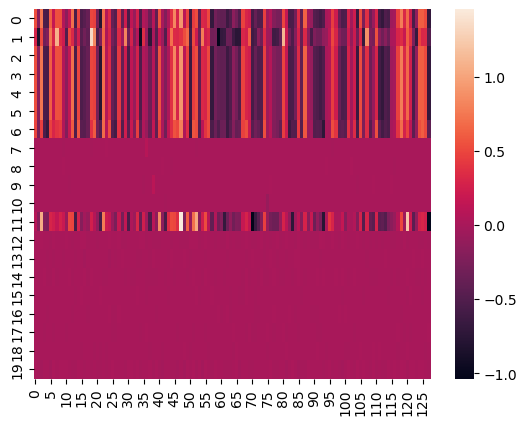

In [7]:
import seaborn as sns
sns.heatmap(utils.backbone.backbone.embeddings.word_embeddings.weight.detach().numpy())

#grad is only nonzero on the useless ones, all the ones that are used that do soemoting have no gradients, which makes a lot of sense!!

# ISM with GPU

In [1]:
#now we test ISM batched across all cell types with the GPU
from shap_analysis.shap_utils import ShapUtils
ckpt_path = '/data/leslie/sarthak/hyena/hyena-dna/outputs/2024-02-09/17-38-16-568113/checkpoints/last.ckpt' #this is again the 10% 100 epochs one
util = ShapUtils('DNase', ckpt_path, percentage_background = 1/30000)
#we don't actually care about the percentage background, we do our own thing, can make a new utils, but works for now

#use data loaders
from torch.utils.data import DataLoader
loader = DataLoader(util.dataset, batch_size = 161, shuffle = False)

In [2]:
#take the next batch
batch = next(iter(loader))
print(batch[0].shape)

torch.Size([161, 1023])


In [7]:
print(batch[1].shape) #the labels
print(batch[1][0])

torch.Size([161, 1])
tensor([-10.])


In [5]:
print(batch[0][:3,:10]) #we see that there's a bunch of unique permutations, then we can just do the same changes across them and batch it through!

tensor([[12, 13, 14, 15, 16, 17, 18,  9,  7,  7],
        [12, 13, 14, 15, 16, 18, 17,  9,  7,  7],
        [12, 13, 14, 15, 17, 16, 18,  9,  7,  7]])


In [8]:
#first we run it through the model
a = batch[0]
b,_ = util.backbone(a)
out = util.decoder(b)
print(out.shape)
print(out)

torch.Size([161, 1])
tensor([[-0.2317],
        [ 1.1498],
        [ 0.5474],
        [ 0.6007],
        [ 0.7504],
        [ 0.9150],
        [ 0.0593],
        [ 1.0235],
        [ 0.4500],
        [ 0.7750],
        [ 0.9174],
        [ 1.0351],
        [ 0.9115],
        [ 1.1931],
        [ 1.0605],
        [ 1.1690],
        [ 0.9725],
        [ 0.8050],
        [ 0.6059],
        [ 0.5918],
        [ 0.6701],
        [ 0.1726],
        [-0.1979],
        [ 0.5000],
        [ 0.5816],
        [ 0.2390],
        [ 0.1540],
        [ 0.4467],
        [ 0.0373],
        [ 0.7500],
        [ 0.4688],
        [ 1.0010],
        [ 0.6423],
        [ 0.1326],
        [ 0.8639],
        [ 0.9109],
        [ 0.6262],
        [ 0.1504],
        [ 0.5698],
        [ 0.9573],
        [ 0.6436],
        [ 1.1065],
        [ 0.6718],
        [ 0.9241],
        [ 1.2953],
        [ 1.2850],
        [ 0.8975],
        [ 0.9119],
        [ 0.1637],
        [ 0.6034],
        [ 0.5770],
        [ 

In [10]:
#let's see how long it takes on the GPU
backbone = util.backbone.cuda()
decoder = util.decoder.cuda()
a = a.cuda()
b,_ = backbone(a)
out_gt = decoder(b)
print(out_gt.shape) #much faster!!

torch.Size([161, 1])


In [14]:
out_gt_np = out_gt.detach().cpu().numpy().reshape(1, 1, 161)
print(out_gt_np.shape)

(1, 1, 161)


In [17]:
import numpy as np
ISM_results = np.ones((4,1023,161))*out_gt_np
print(ISM_results[:,:,0]) #all that same value!!

[[-0.23170127 -0.23170127 -0.23170127 ... -0.23170127 -0.23170127
  -0.23170127]
 [-0.23170127 -0.23170127 -0.23170127 ... -0.23170127 -0.23170127
  -0.23170127]
 [-0.23170127 -0.23170127 -0.23170127 ... -0.23170127 -0.23170127
  -0.23170127]
 [-0.23170127 -0.23170127 -0.23170127 ... -0.23170127 -0.23170127
  -0.23170127]]


In [19]:
print(out_gt[0]) #the same answer!!

print(out_gt[1])
print(ISM_results[:,:,1]) #all that same value!! I think we braodcasted properly!!

tensor(-0.2317, device='cuda:0', grad_fn=<SelectBackward0>)
tensor(1.1498, device='cuda:0', grad_fn=<SelectBackward0>)
[[1.14979422 1.14979422 1.14979422 ... 1.14979422 1.14979422 1.14979422]
 [1.14979422 1.14979422 1.14979422 ... 1.14979422 1.14979422 1.14979422]
 [1.14979422 1.14979422 1.14979422 ... 1.14979422 1.14979422 1.14979422]
 [1.14979422 1.14979422 1.14979422 ... 1.14979422 1.14979422 1.14979422]]


In [20]:
seq = batch[0][0] #just take a single sample!
print(seq)
print(seq.shape)

tensor([12, 13, 14,  ...,  7, 10,  9])
torch.Size([1023])


In [25]:
#same plot but we do it minus the global mean
#also, we should actually set the values not to 0 but the default
from tqdm import tqdm
ISM_results = np.ones((4,1023,161))*out_gt_np
seq = batch[0][0] #just take a single sample!
token_list = [7,8,9,10] #tokenize this list first
#for each one there's all 4 tokens, and 1023 positions, will find a way to aggregate across celltypes later
for idx, nucleotide in tqdm(enumerate(seq),total=len(seq)): #the 8th index is the first one we want
    if idx < 7:
        continue
    temp_token_list = token_list.copy() #we make a copy
    temp_token_list.remove(nucleotide)
    temp_token_list = np.array(temp_token_list)
    results_list = []
    for j in temp_token_list:
        temp_seq = batch[0].clone()
        temp_seq[:,idx] = j
        a,_ = backbone(temp_seq.cuda())
        out = decoder(a)
        results_list.append(out.detach().cpu().numpy())
    ISM_results[temp_token_list-7,idx,:] = np.array(results_list).squeeze()
#relatively slow on the CPU
#and now we subtract the out_gt from it
ISM_results_normalized = ISM_results - out_gt.detach().numpy()

  0%|                                                                                                                                                                                                               | 0/1023 [00:00<?, ?it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1023/1023 [02:19<00:00,  7.31it/s]


TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

In [26]:
ISM_results_normalized = ISM_results - out_gt_np

Text(0.5, 80.7222222222222, 'sequence position')

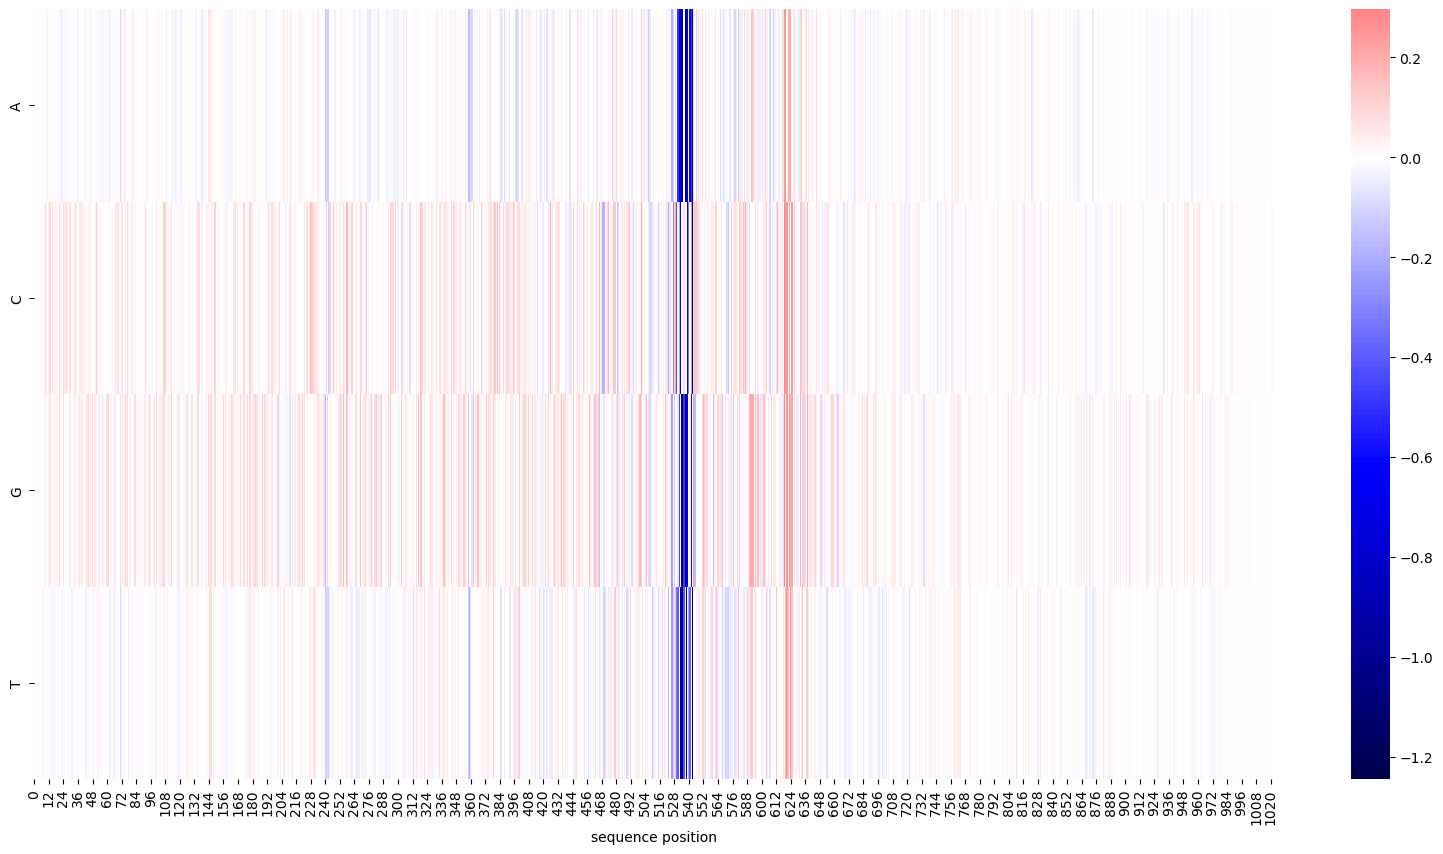

In [27]:
#let's do a heatmap
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize = (20,10))
sns.heatmap(ISM_results_normalized[:,:,0], cmap = 'seismic', center = 0)
plt.yticks([0.5,1.5,2.5,3.5],['A','C','G','T'])
plt.xlabel('sequence position')

In [40]:
#now sum over the 0 dimension and then plot
ISM_results_sum = np.sum(ISM_results_normalized, axis = 0)
print(ISM_results_sum.shape)

(1023, 161)


Text(0.5, 1.0, 'difference from original predcited value via ISM over all celltypes')

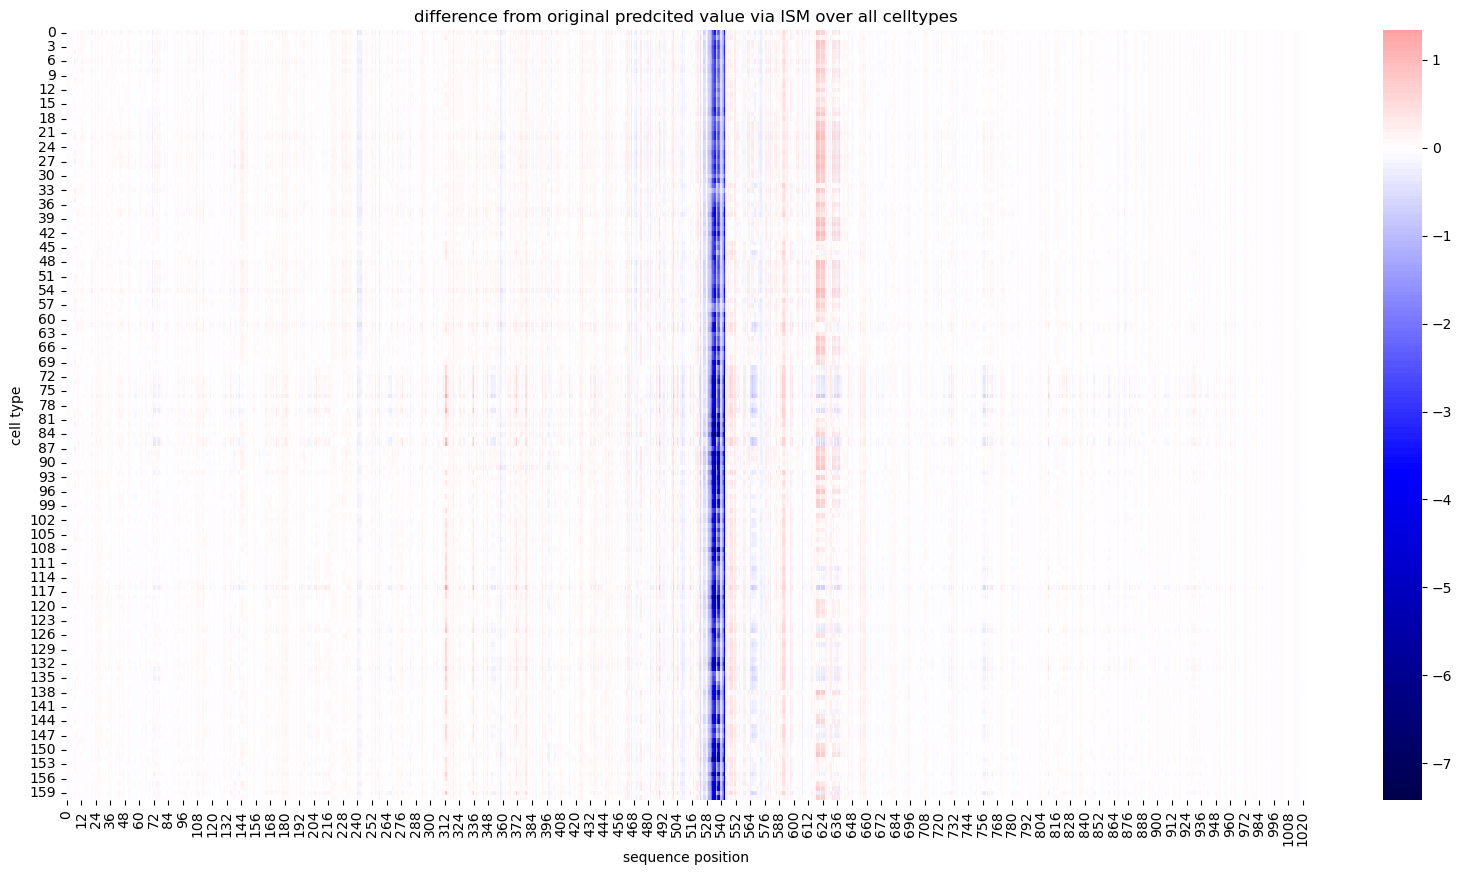

In [42]:
#and plot
fig, ax = plt.subplots(1,1, figsize = (20,10))
sns.heatmap(ISM_results_sum.T, cmap = 'seismic', center = 0)
plt.xlabel('sequence position')
plt.ylabel('cell type')
plt.title('difference from original predcited value via ISM over all celltypes')

Text(220.72222222222223, 0.5, 'cell type')

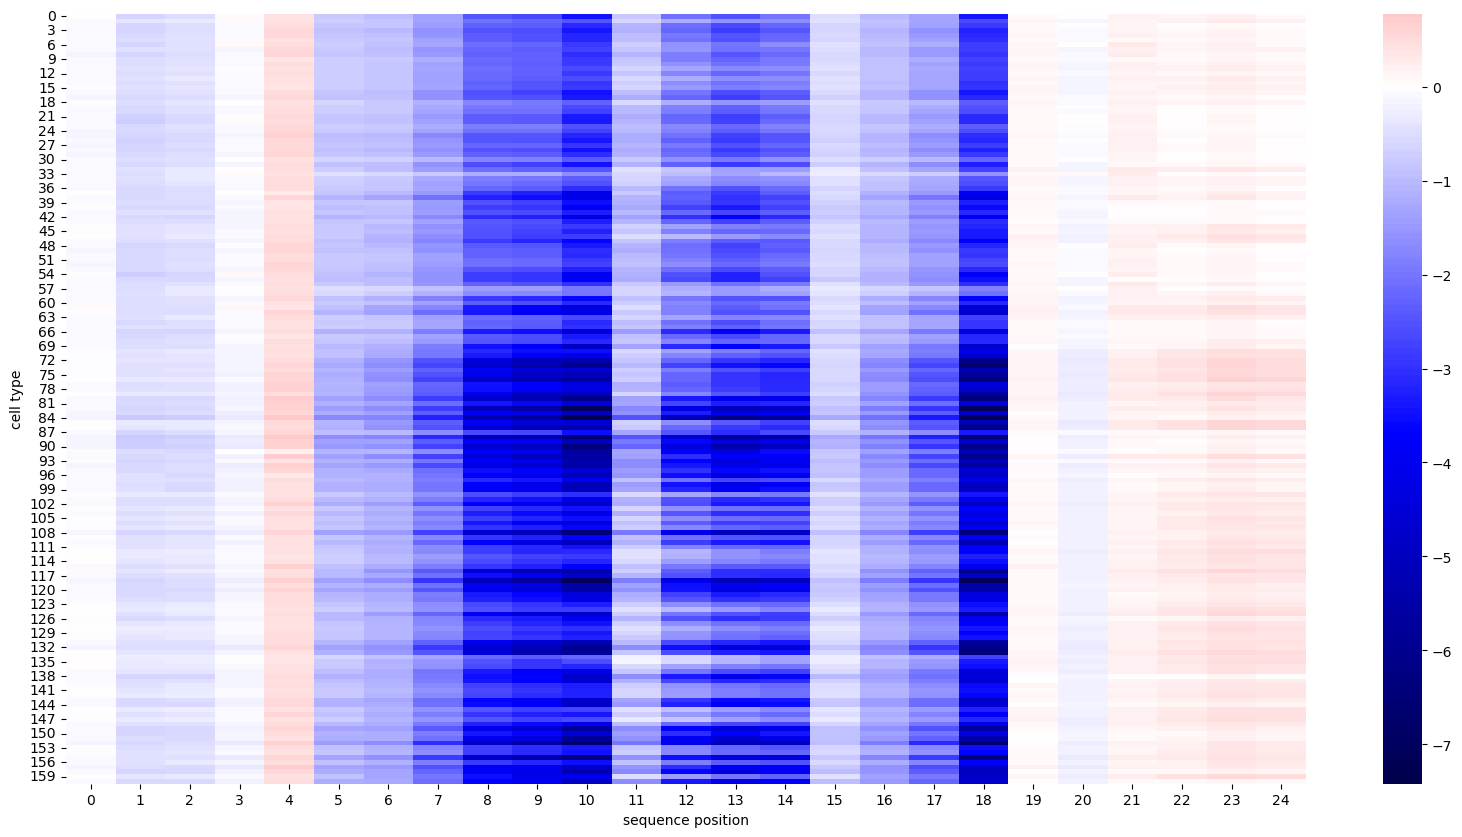

In [45]:
#let's zom in a bit for the middle 350 elements
fig, ax = plt.subplots(1,1, figsize = (20,10))
middle = 1023//2
sns.heatmap(ISM_results_sum[525:550].T, cmap = 'seismic', center = 0)
# sns.heatmap(ISM_results_sum[].T, cmap = 'seismic', center = 0)
plt.xlabel('sequence position')
plt.ylabel('cell type')

In [32]:
#let's get the same celltype as in our previous example to make sure this parallel approach actually works!
idx = 161*640009
dataloader = DataLoader(util.dataset, batch_size = 161, shuffle = False)
#let's skip the first 640008 batches
for i in range(640008):
    batch = next(iter(dataloader))
batch = next(iter(dataloader)) #takes forever to run, let's just trust it, or test it with a much smaller batch

KeyboardInterrupt: 

In [37]:
#let's define batch directly with the dataset
import torch
templist = []
label_list = []
for i in range(161):
    a,b = util.dataset[idx+i]
    templist.append(a)
    label_list.append(b)
#and concatenate it together
batch = torch.stack(templist)
print(batch.shape)
labels = torch.stack(label_list)

torch.Size([161, 1023])


In [38]:
print(batch[0,0:20])
print(labels)

tensor([12, 13, 14, 15, 16, 17, 18,  7, 10,  8,  7,  7,  8,  7, 10,  7, 10, 10,
        10, 10])
tensor([[-1.0000e+01],
        [-6.0799e-01],
        [-3.1757e-01],
        [-7.5830e-01],
        [-1.2571e+00],
        [-1.0642e+00],
        [-1.9508e+00],
        [-3.1255e-01],
        [-6.6320e-01],
        [-8.6161e-01],
        [-5.1797e-01],
        [-1.4855e+00],
        [-3.8293e+00],
        [-1.0185e+00],
        [-1.2984e+00],
        [-1.1529e+00],
        [-2.6264e+00],
        [-1.3453e+00],
        [ 5.3420e-01],
        [-1.5833e+00],
        [-1.1922e+00],
        [-1.9194e+00],
        [-4.3587e-01],
        [ 1.5923e-01],
        [ 4.5670e-02],
        [-3.3560e-01],
        [-6.5720e-01],
        [-9.7389e-02],
        [ 8.1826e-02],
        [-1.0000e+01],
        [-3.6121e-01],
        [-1.4228e+00],
        [-5.7906e-01],
        [-1.0000e+01],
        [-1.4840e+00],
        [-9.8611e-01],
        [-3.0398e-01],
        [ 5.5431e-02],
        [-4.0341e-01],
      

In [39]:
a,b = util.dataset[idx]
print(a[0:20])
print(b)

#looks like they are the same, so dataloader should be fine...

tensor([12, 13, 14, 15, 16, 17, 18,  7, 10,  8,  7,  7,  8,  7, 10,  7, 10, 10,
        10, 10])
tensor([-10.])


In [49]:
#wrap it all in a for loop for many cCREs and wrap that in eval
dataloader = DataLoader(util.dataset, batch_size = 161, shuffle = False)
for ccre in tqdm(range(1000)): # just do for 1000 of them
    with torch.no_grad():
        batch = next(iter(dataloader))
        #now let's get the batch
        #let's see how long it takes on the GPU
        backbone = util.backbone.cuda()
        decoder = util.decoder.cuda()
        a = batch[0].cuda()
        # a = a.cuda()
        b,_ = backbone(a)
        out_gt = decoder(b)
        # print(out_gt.shape) #much faster!!
        out_gt_np = out_gt.detach().cpu().numpy().reshape(1, 1, 161)
        # print(out_gt_np.shape)
        
        ISM_results = np.ones((4,1023,161))*out_gt_np
        seq = batch[0][0] #just take a single sample!
        token_list = [7,8,9,10] #tokenize this list first
        #for each one there's all 4 tokens, and 1023 positions, will find a way to aggregate across celltypes later
        for idx, nucleotide in enumerate(seq): #the 8th index is the first one we want
            if idx < 7:
                continue
            temp_token_list = token_list.copy() #we make a copy
            temp_token_list.remove(nucleotide)
            temp_token_list = np.array(temp_token_list)
            results_list = []
            for j in temp_token_list:
                temp_seq = batch[0].clone()
                temp_seq[:,idx] = j
                a,_ = backbone(temp_seq.cuda())
                out = decoder(a)
                results_list.append(out.detach().cpu().numpy())
            ISM_results[temp_token_list-7,idx,:] = np.array(results_list).squeeze()
        #relatively slow on the CPU
        #and now we subtract the out_gt from it
        ISM_results_normalized = ISM_results - out_gt_np
        np.save(f'/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/saved_ISM/ISM_run1_normalized_{ccre}.npy', ISM_results_normalized)
        break
#if this works, then we know that we can just run it!! 

  0%|                                                                                                                                                                                          | 0/1000 [02:19<?, ?it/s]


Text(0.5, 80.7222222222222, 'sequence position')

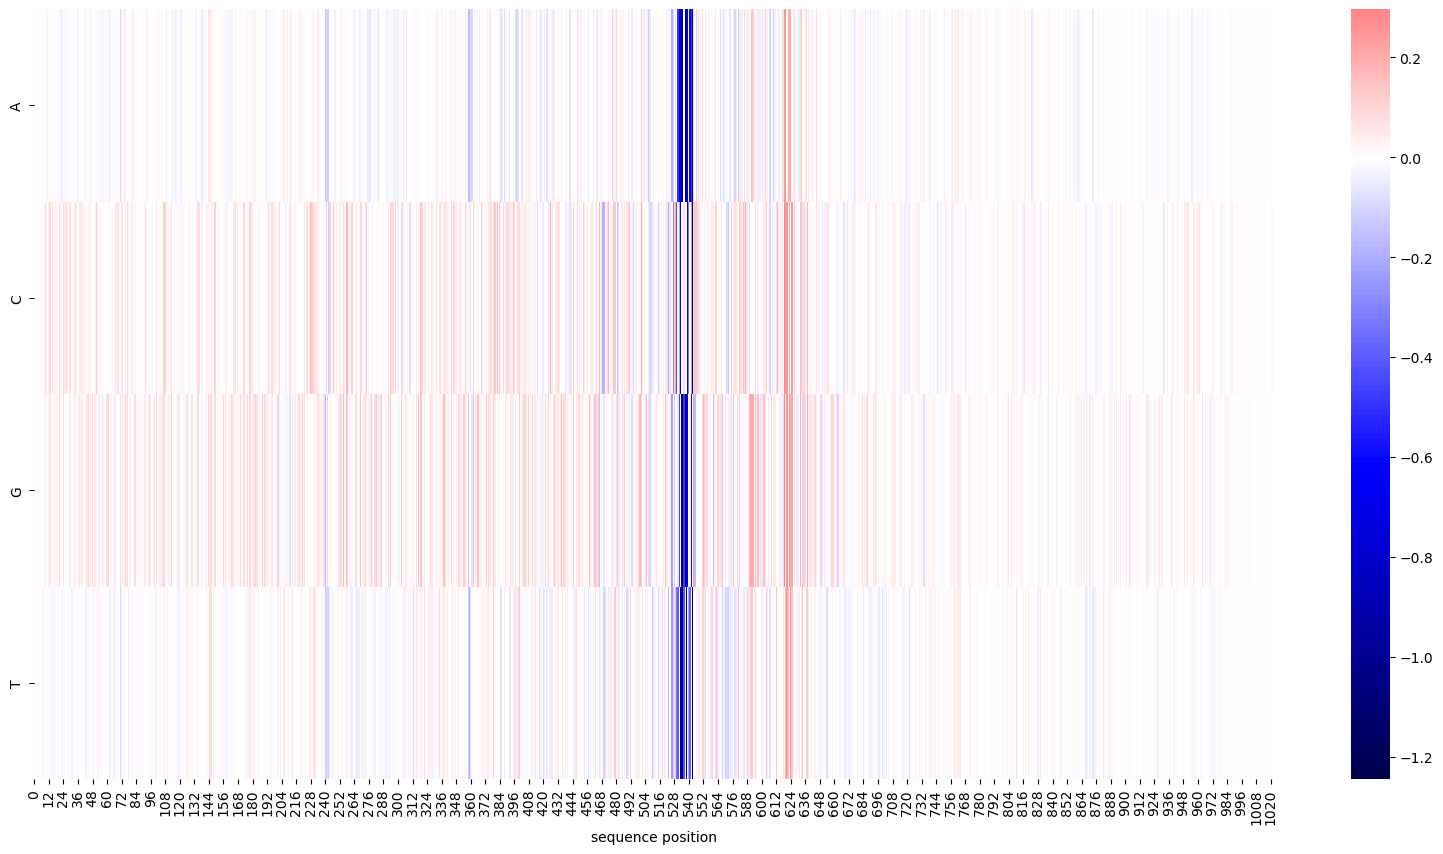

In [50]:
#let's do a heatmap
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize = (20,10))
sns.heatmap(ISM_results_normalized[:,:,0], cmap = 'seismic', center = 0)
plt.yticks([0.5,1.5,2.5,3.5],['A','C','G','T'])
plt.xlabel('sequence position')
#identical, we're good to save it!!

# ISM for the multitasking model

In [1]:
#now we test ISM batched across all cell types with the GPU
from shap_analysis.shap_utils import ShapUtils
all_ckpt_path = '/data/leslie/sarthak/hyena/hyena-dna/outputs/2024-02-17/09-34-21-368888/checkpoints/last.ckpt'
util = ShapUtils('DNase_allcelltypes', all_ckpt_path, percentage_background = 1/30000)
#we don't actually care about the percentage background, we do our own thing, can make a new utils, but works for now

#use data loaders
from torch.utils.data import DataLoader
loader = DataLoader(util.dataset, batch_size = 1, shuffle = False)

In [2]:
batch = next(iter(loader))
print(batch[0].shape)
print(batch[1].shape) #the labels

torch.Size([1, 1023])
torch.Size([1, 161])


In [3]:
#has to be slightly custom, since we only do one sequence, but it's for 161 cell types at once
from tqdm import tqdm
import torch
import numpy as np
#wrap it all in a for loop for many cCREs and wrap that in eval
dataloader = DataLoader(util.dataset, batch_size = 1, shuffle = False)
for ccre in tqdm(range(100)): # just do for 1000 of them
    with torch.no_grad():
        batch = next(iter(dataloader))
        #now let's get the batch
        #let's see how long it takes on the GPU
        backbone = util.backbone.cuda()
        decoder = util.decoder.cuda()
        a = batch[0].cuda()
        # a = a.cuda()
        b,_ = backbone(a)
        out_gt = decoder(b)
        # print(out_gt.shape) #much faster!!
        out_gt_np = out_gt.detach().cpu().numpy().reshape(1, 1, 161)
        # print(out_gt_np.shape)
        
        ISM_results = np.ones((4,1023,161))*out_gt_np
        seq = batch[0][0] #just take a single sample!
        token_list = [7,8,9,10] #tokenize this list first
        #for each one there's all 4 tokens, and 1023 positions, will find a way to aggregate across celltypes later
        for idx, nucleotide in enumerate(seq): #the 8th index is the first one we want
            if idx < 7:
                continue
            temp_token_list = token_list.copy() #we make a copy
            temp_token_list.remove(nucleotide)
            temp_token_list = np.array(temp_token_list)
            results_list = []
            for j in temp_token_list:
                temp_seq = batch[0][0].clone()
                temp_seq[idx] = j
                a,_ = backbone(temp_seq.unsqueeze(0).cuda())
                out = decoder(a)
                results_list.append(out.detach().cpu().numpy())
                # break
            # break
            ISM_results[temp_token_list-7,idx,:] = np.array(results_list).squeeze()
        #relatively slow on the CPU
        #and now we subtract the out_gt from it
        ISM_results_normalized = ISM_results - out_gt_np
        np.save(f'/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/saved_ISM/ISM_run1_normalized_allcelltypes{ccre}.npy', ISM_results_normalized)
        break
#if this works, then we know that we can just run it!! 

  0%|                                                                                                                                                                                           | 0/100 [00:00<?, ?it/s]

  0%|                                                                                                                                                                                           | 0/100 [00:10<?, ?it/s]


In [9]:
out.shape #when we contatenate they will be 3 x 1 x 161, so squeeze it to be 3 x 161, we specify the 3 bases to put the data in, it goes in the corresponding sequence number
#out of 1023, and then we do it across all 161 celltypes!!

torch.Size([1, 161])

Text(0.5, 80.7222222222222, 'sequence position')

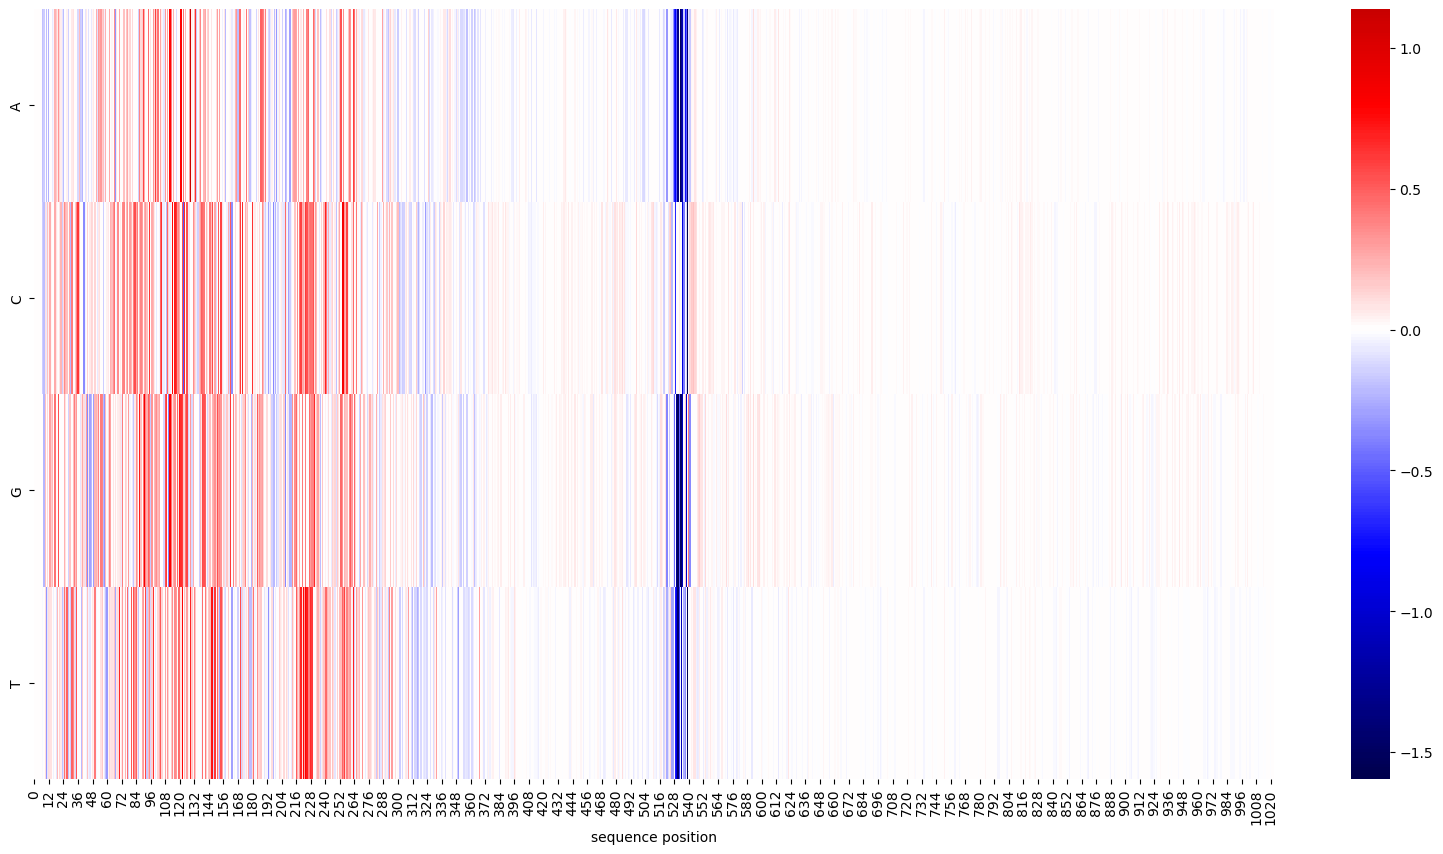

In [4]:
#let's try plotting
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize = (20,10))
sns.heatmap(ISM_results_normalized[:,:,0], cmap = 'seismic', center = 0)
plt.yticks([0.5,1.5,2.5,3.5],['A','C','G','T'])
plt.xlabel('sequence position')
#identical, we're good to save it!!
#looks like our code works just fine!!

In [5]:
# try summing
ISM_results_sum = np.sum(ISM_results_normalized, axis = 0)
print(ISM_results_sum.shape)

(1023, 161)


<Axes: >

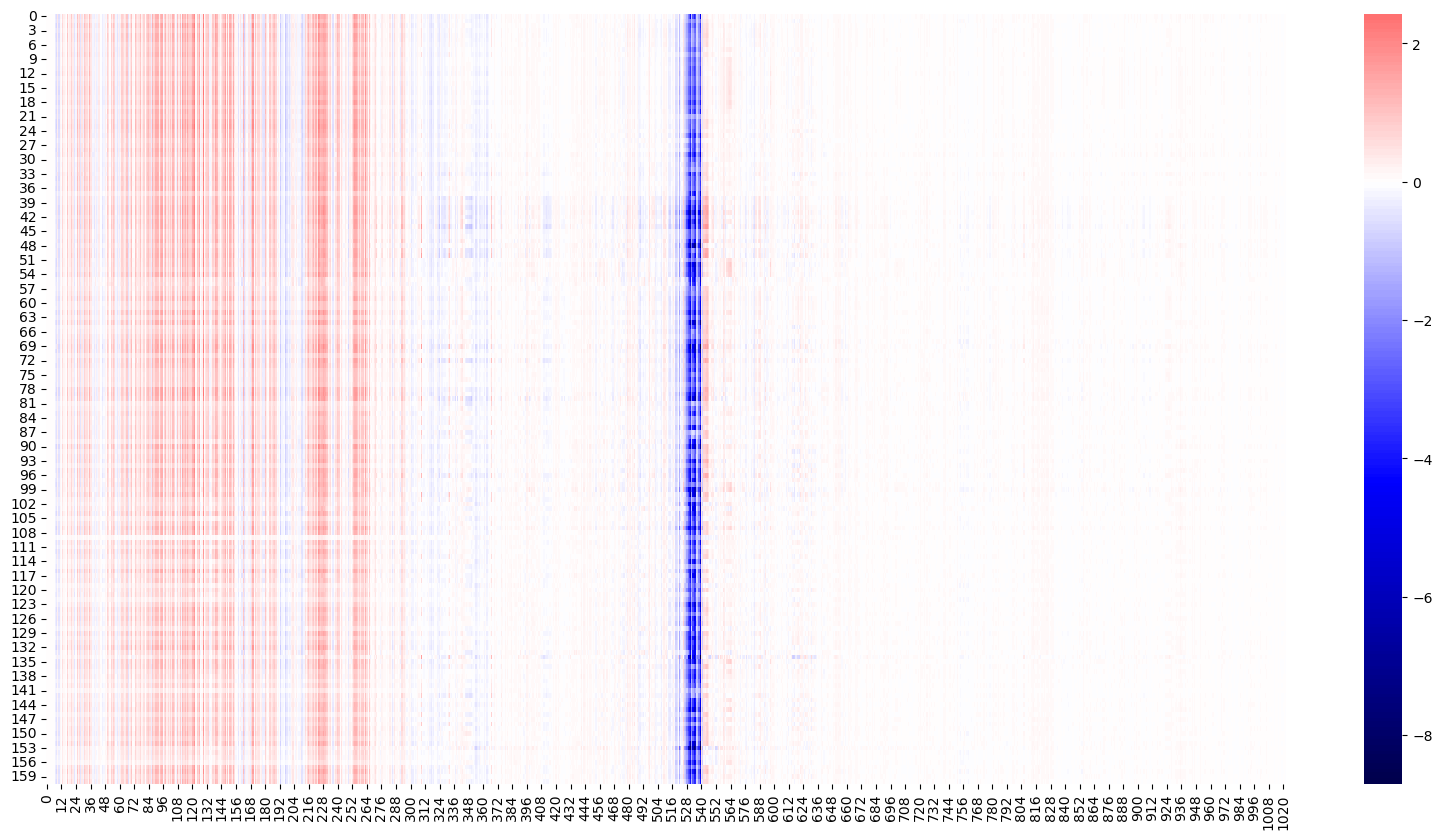

In [6]:
#and plot again
fig, ax = plt.subplots(1,1, figsize = (20,10))
sns.heatmap(ISM_results_sum.T, cmap = 'seismic', center = 0)

#results look pretty damn decent!! Looks worse for this cuz paying attention to th estuff off to the side, not in the center where it matters!!